<a href="https://colab.research.google.com/github/deNzik3/data_analytics_projects/blob/main/olympic_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Overview
**In this notebook, I'll cover the full process of building a  machine learning project. This includes creating a hypothesis, setting up the model, and measuring error.**
**To make this interesting, I'll use a fun dataset. I'll use data from historical Olympic games. I'll try to predict how many medals a country will win based on historical and current data.**

#Importing libraries

In [71]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#Loading dataset

In [72]:
df = pd.read_csv("/content/teams.csv")

In [73]:
df.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


#Data cleaning and preparation

**Now I'll create a summary function to find out some insights about dataset**

In [74]:
def summary(df):
  print(f'data shape: {df.shape}')
  summ = pd.DataFrame(df.dtypes, columns=['data type'])
  summ['#missing'] = df.isnull().sum().values * 100
  summ['%missing'] = df.isnull().sum().values / len(df)
  summ['#unique'] = df.nunique().values
  summ['#duplicates'] = df.duplicated().count()
  desc = pd.DataFrame(df.describe(include='all').transpose())
  summ['min'] = desc['min'].values
  summ['max'] = desc['max'].values
  summ['first value'] = df.loc[0].values
  summ['second value'] = df.loc[1].values
  summ['third value'] = df.loc[2].values

  return summ

In [75]:
summary(df)

data shape: (2144, 11)


,data type,#missing,%missing,#unique,#duplicates,min,max,first value,second value,third value
team,object,0,0.000000,219,2144,NaN,NaN,AFG,AFG,AFG
country,object,0,0.000000,235,2144,NaN,NaN,Afghanistan,Afghanistan,Afghanistan
year,int64,0,0.000000,14,2144,1964.0,2016.0,1964,1968,1972
events,int64,0,0.000000,216,2144,1.0,270.0,8,5,8
athletes,int64,0,0.000000,367,2144,1.0,839.0,8,5,8
age,float64,0,0.000000,160,2144,17.0,66.0,22.0,23.2,29.0
height,float64,0,0.000000,273,2144,151.0,193.0,161.0,170.2,168.3
weight,float64,0,0.000000,354,2144,43.0,148.0,64.2,70.0,63.8
medals,int64,0,0.000000,133,2144,0.0,442.0,0,0,0
prev_medals,float64,13000,0.060634,126,2144,0.0,442.0,0.0,0.0,0.0


**As we might see, we have some missing values in 2 columns("prev_medals" and "prev_3_medals"**

In [76]:
teams = df[["team","country","year","athletes","age","prev_medals","medals"]].copy()

In [77]:
teams.head()

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0


**Finding NaN values**

In [78]:
teams[teams.isna().any(axis = 1)] #we have 130 rows of missing values

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [79]:
teams = teams.dropna()

In [80]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


**Let's find out a correlation between medals and other columns**

In [81]:
teams.corr()["medals"]

<ipython-input-81-90b4da85dcae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teams.corr()["medals"]


year          -0.034870
athletes       0.839909
age            0.023231
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

**We see that the previous medals (which is very logical) and the number of athletes are best correlated with the number of medals**

#Data visualization for better understanding which model we need

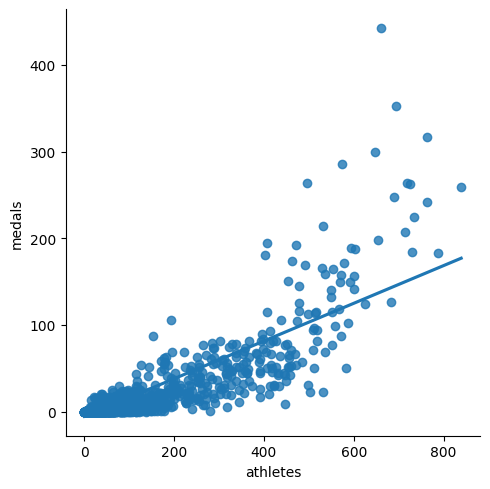

In [82]:
sns.lmplot(data = teams, x = "athletes",y = 'medals', fit_reg = True, ci = None)

**There we have some kind of linear dependence**

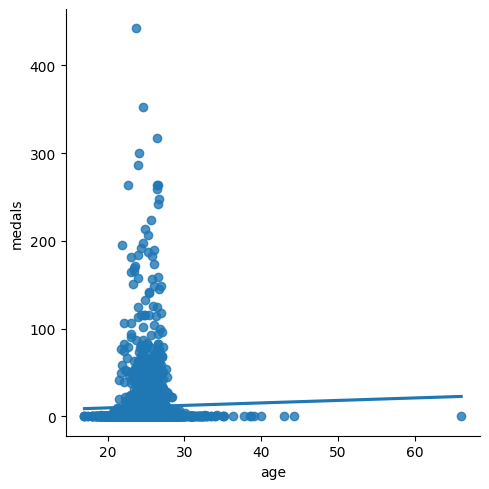

In [83]:
sns.lmplot(data = teams, x = "age",y = 'medals', fit_reg = True, ci = None)

<Axes: title={'center': 'How many medals are received most often?'}, xlabel='medals', ylabel='Count'>

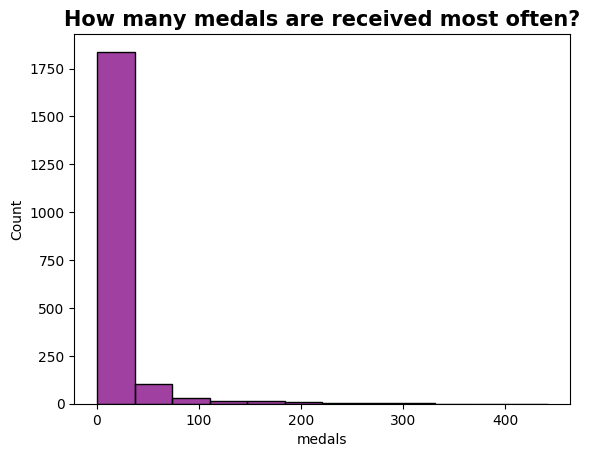

In [84]:
plt.title("How many medals are received most often?",weight = 'heavy',size = 15)
sns.histplot(data = teams,x = "medals",color = "purple",
             bins = 12)

**I must say that this dataset is kind of imbalanced, because only few countries have more that 100 medals**

#Building a model

In [85]:
teams.head()

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0


In [86]:
data = teams[["athletes","prev_medals","medals"]].copy()
data

,athletes,prev_medals,medals
0,8,0.0,0
1,5,0.0,0
2,8,0.0,0
3,11,0.0,0
4,5,0.0,0
...,...,...,...
2139,26,0.0,0
2140,14,0.0,3
2141,16,3.0,4
2142,9,4.0,0


In [87]:
X = data.drop("medals",axis = 1)
y = data.medals

In [88]:
X.head()

,athletes,prev_medals
0,8,0.0
1,5,0.0
2,8,0.0
3,11,0.0
4,5,0.0


**Creating a test and train datasets**

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
lr = LinearRegression()

In [93]:
lr.fit(X_train,y_train)

LinearRegression()

**Train accuracy**

In [94]:
lr.score(X_train,y_train)

0.8652833951883572

**Test accuracy**

In [95]:
lr.score(X_test,y_test)

0.8863588679092761

**As we see, we've done a good job and in 88% we have the right answer. However, we might get it better!**

In [96]:
test_size_val = np.arange(0.01,1,0.01)

In [97]:
scores_data = pd.DataFrame()

In [ ]:
for test_size in test_size_val:

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)

  lr.fit(X_train,y_train)

  train_score = lr.score(X_train,y_train)
  test_score = lr.score(X_test,y_test)

  

  temp_scores_data = pd.DataFrame({
      "test_size": [test_size],
      "train_score":[train_score],
      "test_score":[test_score]
      
  })

  scores_data = scores_data.append(temp_scores_data)


In [99]:
scores_data

,test_size,train_score,test_score
0,0.01,0.870071,0.947305
0,0.02,0.869162,0.931580
0,0.03,0.869538,0.922665
0,0.04,0.870497,0.905215
0,0.05,0.870361,0.907297
...,...,...,...
0,0.95,0.933344,0.839192
0,0.96,0.929589,0.839968
0,0.97,0.935053,0.836185
0,0.98,0.940147,0.816439


<Axes: title={'center': 'Training and test sets comparison'}, xlabel='test_size', ylabel='train_score'>

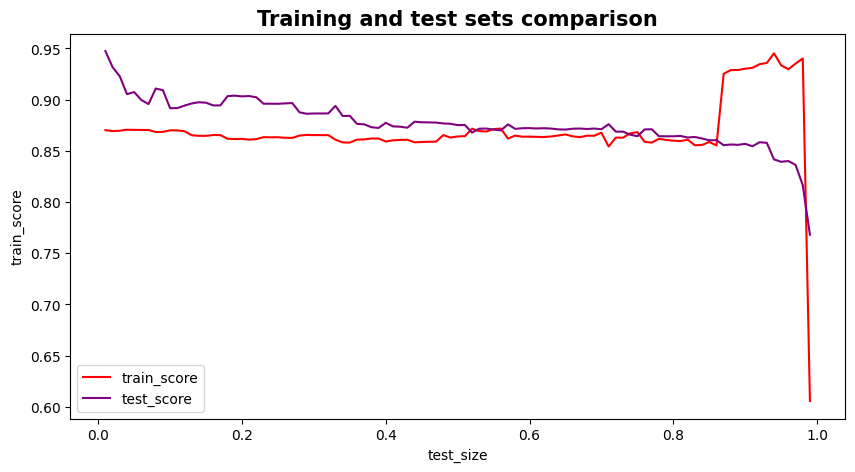

In [100]:
plt.figure(figsize = (10,5))
plt.title("Training and test sets comparison", weight = 'heavy',size =15)

sns.lineplot(data = scores_data, x = "test_size",y = "train_score", label = "train_score",color = 'red')
sns.lineplot(data =scores_data, x = 'test_size', y = 'test_score', label = "test_score",color = 'purple' )

#Building an improved model

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [102]:
lr.fit(X_train,y_train)

LinearRegression()

In [103]:
lr.score(X_train,y_train)

0.8615889207310222

In [104]:
lr.score(X_test,y_test)

0.9030566068896431

**We have a 90% accuracy!**

#Model evaluation

In [105]:
predictions = lr.predict(X)

In [106]:
data["prediction"] = predictions

In [107]:
data.head()

,athletes,prev_medals,medals,prediction
0,8,0.0,0,-1.259380
1,5,0.0,0,-1.443006
2,8,0.0,0,-1.259380
3,11,0.0,0,-1.075754
4,5,0.0,0,-1.443006


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2014 entries, 0 to 2143
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   athletes     2014 non-null   int64  
 1   prev_medals  2014 non-null   float64
 2   medals       2014 non-null   int64  
 3   prediction   2014 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 78.7 KB


In [109]:
data[data.prediction < 0] 

,athletes,prev_medals,medals,prediction
0,8,0.0,0,-1.259380
1,5,0.0,0,-1.443006
2,8,0.0,0,-1.259380
3,11,0.0,0,-1.075754
4,5,0.0,0,-1.443006
...,...,...,...,...
2132,7,0.0,0,-1.320589
2137,28,0.0,0,-0.035205
2138,21,0.0,0,-0.463666
2139,26,0.0,0,-0.157622


In [110]:
data.loc[data["prediction"] < 0,"prediction"] = 0 #Replace all negative values with zero

In [111]:
data.head()

,athletes,prev_medals,medals,prediction
0,8,0.0,0,0.0
1,5,0.0,0,0.0
2,8,0.0,0,0.0
3,11,0.0,0,0.0
4,5,0.0,0,0.0


In [112]:
data.prediction = data.prediction.round()

In [115]:
from sklearn.metrics import mean_absolute_error

In [117]:
mean_absolute_error(data.medals,data.prediction)

4.208043694141013